## Import libraries

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## import data and define graph

In [2]:
data = 'preprocessed_id.txt'
dataGraph = nx.read_edgelist(data)
type (dataGraph)
print(nx.info(dataGraph))

Name: 
Type: Graph
Number of nodes: 1445
Number of edges: 1379
Average degree:   1.9087


In [3]:
edgeList = pd.read_csv(data, sep="\t", header=None)
edgeList.head()

,0,1
0,1289956071537172484,1046084008742801408
1,1171388755,1046084008742801408
2,548904824,589687384
3,548904824,1246657358844923904
4,779784931,255409050


In [4]:
# Define graph as G
G = nx.Graph()

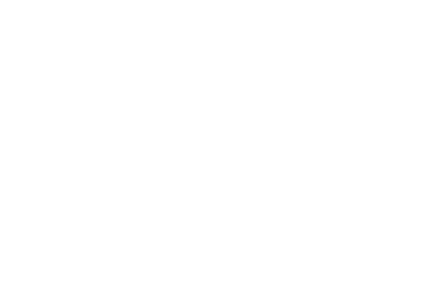

In [5]:
# Draw graph G

nx.draw(G)
plt.show()

In [6]:
# Add edge list into graph

for i, edge in edgeList.iterrows():
    G.add_edge(edge[0], edge[1])

In [7]:
# Calculate number of degree of the graph

def calculate_degree(G,n = 0):
    fmdegree = []
    fmNode= []
    for node in G.nodes():
        tempD = G.degree(node)
        if tempD >= n : fmdegree.append(tempD),fmNode.append(node)
    
    return fmdegree,fmNode

In [8]:
# Print number of min and max degree

gpdDegree, gpdNode = calculate_degree(G,0)
print('Maximum Degree of the node in this network :', max(gpdDegree))
print('Manimum Degree of the node in this network :', min(gpdDegree))

Maximum Degree of the node in this network : 167
Manimum Degree of the node in this network : 1


In [9]:
# Print pair of node and its degree

data = {'Node' : gpdNode,
        'Degree' : gpdDegree}
df_NodeDegree = pd.DataFrame(data)
df_NodeDegree.head()

,Node,Degree
0,1289956071537172484,1
1,1046084008742801408,93
2,1171388755,1
3,548904824,60
4,589687384,1


In [10]:
# Sort nodes based on the degree

df_NodeDegree.sort_values(by=['Degree'], inplace=True, ascending=False)
df_NodeDegree.head(10)

,Node,Degree
7,255409050,167
89,393823624,110
1,1046084008742801408,93
611,69183155,60
3,548904824,60
105,4187275698,38
116,1068065299214163968,37
182,1304156379494506497,32
78,982557721575608320,27
24,100447031,26


In [11]:
# Network of node 255409050
G[255409050]

AtlasView({779784931: {}, 1191666951992426496: {}, 772369903542153217: {}, 1265045853611479040: {}, 1185895125408309251: {}, 233453602: {}, 1092600230036496384: {}, 1729592713: {}, 1033994528523354112: {}, 1297296847854170112: {}, 217731071: {}, 2592311312: {}, 917675732079329280: {}, 3355706668: {}, 768731685575729152: {}, 729229672349765632: {}, 1291193792104603648: {}, 1288111697224282112: {}, 1112181774992314368: {}, 4201441519: {}, 1177841654759219200: {}, 1206669167589330944: {}, 863337891019149312: {}, 1524416606: {}, 1187209594117844992: {}, 1305965279931846656: {}, 884736227064266752: {}, 1285403202976755713: {}, 188642114: {}, 1264891396881694722: {}, 917440593877278720: {}, 1306874818839494656: {}, 1372201550: {}, 1649606504: {}, 2456958924: {}, 177502901: {}, 1078965512963387394: {}, 1196040384591220736: {}, 833217376271241216: {}, 902122958918963200: {}, 3848731: {}, 1119217226085650432: {}, 878946816: {}, 1005567776029724678: {}, 72514550: {}, 1073996516308660224: {}, 109

## Degree centrality

In [24]:
# Count degree centrality

dc = nx.degree_centrality(G)
max_dc = list(dc.values())
print("Top 10 degree centrality value")
print(sorted(max_dc, reverse=False)[:10])

Top 10 degree centrality value
[0.0006925207756232687, 0.0006925207756232687, 0.0006925207756232687, 0.0006925207756232687, 0.0006925207756232687, 0.0006925207756232687, 0.0006925207756232687, 0.0006925207756232687, 0.0006925207756232687, 0.0006925207756232687]


In [23]:
# Map the node, number of degree, and degree centrality value

node_to_degrees = sorted(dict(G.degree()).items(), key = lambda x: x[1], reverse = True)
n_1 = float(len(node_to_degrees) - 1)
degree_centrality = [ (n, k, k/n_1) for n, k in node_to_degrees ]
sorted(degree_centrality, key = lambda x: x[2], reverse=True)[:10]
# print(top10)

[(255409050, 167, 0.11565096952908588),
 (393823624, 110, 0.07617728531855955),
 (1046084008742801408, 93, 0.06440443213296398),
 (548904824, 60, 0.04155124653739612),
 (69183155, 60, 0.04155124653739612),
 (4187275698, 38, 0.02631578947368421),
 (1068065299214163968, 37, 0.025623268698060944),
 (1304156379494506497, 32, 0.0221606648199446),
 (982557721575608320, 27, 0.018698060941828253),
 (100447031, 26, 0.018005540166204988)]

## Print top 10 influencers

In [14]:
import tweepy
CONSUMER_KEY = ""
CONSUMER_SECRET = ""
ACCESS_TOKEN = ""
ACCESS_TOKEN_SECRET = ""

auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET) 
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [15]:
IDs = []
for ID in top10 :
    IDs.append(ID[0])

print("Top 10 most influential users : ")
for ID in top10 :
    user = api.get_user(ID[0]) 
    screen_name = user.screen_name
    print("Username: ", screen_name, "| No. Degree: ", ID[1], "| Degree Centrality : ", ID[2])

Top 10 most influential users : 
Username:  Telkomsel | No. Degree:  167 | Degree Centrality :  0.11565096952908588
Username:  kemdikbud | No. Degree:  110 | Degree Centrality :  0.07617728531855955
Username:  collegemenfess | No. Degree:  93 | Degree Centrality :  0.06440443213296398
Username:  IndosatCare | No. Degree:  60 | Degree Centrality :  0.04155124653739612
Username:  detikcom | No. Degree:  60 | Degree Centrality :  0.04155124653739612
Username:  TirtoID | No. Degree:  38 | Degree Centrality :  0.02631578947368421
Username:  3CareIndonesia | No. Degree:  37 | Degree Centrality :  0.025623268698060944
Username:  Bariq227 | No. Degree:  32 | Degree Centrality :  0.0221606648199446
Username:  IndosatOoredoo | No. Degree:  27 | Degree Centrality :  0.018698060941828253
Username:  ITJen | No. Degree:  26 | Degree Centrality :  0.018005540166204988


In [22]:
IDs = []
for ID in top10 :
    IDs.append(ID[0])

print("Top 10 most influential users : ")
for ID in top10 :
    user = api.get_user(ID[0]) 
    screen_name = user.screen_name
    print(screen_name)

Top 10 most influential users : 
Telkomsel
kemdikbud
collegemenfess
IndosatCare
detikcom
TirtoID
3CareIndonesia
Bariq227
IndosatOoredoo
ITJen
